In [2]:
from keras.datasets import reuters

# Train and Test Data

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
train_labels[10]

3

In [34]:
"Number of Labeled Topics", len(set(train_labels))

('Number of Labeled Topics', 46)

# Data Preparation

In [44]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model Definition

In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # Produces a probability distribution over the different output classes

c:\Users\hjfen\.virtualenvs\textbook-homework-S1kjZFOz\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Training and Validation

In [37]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [38]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3328 - loss: 3.4203 - val_accuracy: 0.6210 - val_loss: 2.0718
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6555 - loss: 1.8233 - val_accuracy: 0.6970 - val_loss: 1.4935
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7267 - loss: 1.3126 - val_accuracy: 0.7220 - val_loss: 1.2603
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7731 - loss: 1.0540 - val_accuracy: 0.7460 - val_loss: 1.1291
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8129 - loss: 0.8638 - val_accuracy: 0.7530 - val_loss: 1.0567
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8444 - loss: 0.7141 - val_accuracy: 0.7830 - val_loss: 0.9924
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8758 - loss: 0.5938 - val_accuracy: 0.7800 - val_loss: 0.9879
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8925 - loss: 0.5221 - val_accuracy: 0.8020 - v

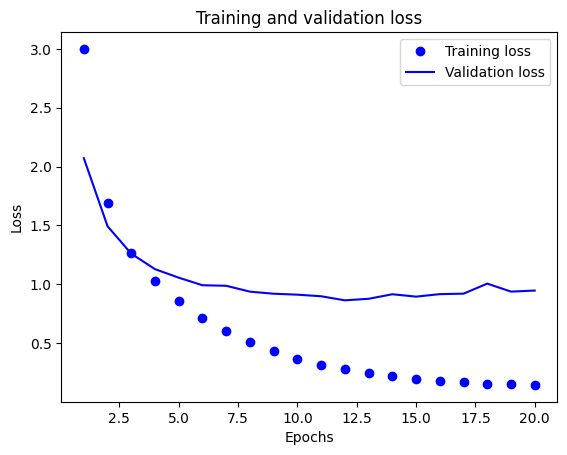

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

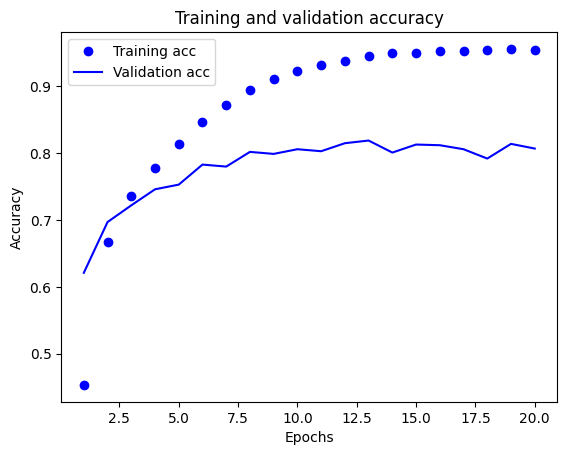

In [42]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Retraining the Model to the best Epoch

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    # loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=13,
    batch_size=512,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, one_hot_test_labels)

c:\Users\hjfen\.virtualenvs\textbook-homework-S1kjZFOz\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3721 - loss: 3.4068 - val_accuracy: 0.6130 - val_loss: 2.0985
Epoch 2/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6545 - loss: 1.8549 - val_accuracy: 0.6670 - val_loss: 1.4919
Epoch 3/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7112 - loss: 1.3360 - val_accuracy: 0.7140 - val_loss: 1.2788
Epoch 4/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7674 - loss: 1.0746 - val_accuracy: 0.7580 - val_loss: 1.1365
Epoch 5/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8093 - loss: 0.9173 - val_accuracy: 0.7830 - val_loss: 1.0654
Epoch 6/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8393 - loss: 0.7749 - val_accuracy: 0.7980 - val_loss: 0.9957
Epoch 7/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8625 - loss: 0.6566 - val_accuracy: 0.8070 - val_loss: 0.9508
Epoch 8/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8821 - loss: 0.5614 - val_accuracy: 0.8070 - v

In [53]:
"Model Accuracy", results[1]

('Model Accuracy', 0.7902938723564148)

In [55]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

"Purely Random Classifier Accuracy", float(np.sum(hits_array)) / len(test_labels)

('Purely Random Classifier Accuracy', 0.18477292965271594)

# Using the Model

In [56]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [57]:
predictions[0].shape

(46,)

In [58]:
np.sum(predictions[0])

1.0

In [61]:
np.argmax(predictions[0]), predictions[0][np.argmax(predictions[0])]

(3, 0.6884371)